# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

  Using cached citipy-0.0.6-py3-none-any.whl


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | magadan
Processing Record 2 of Set 1 | anuradhapura
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | gargalianoi
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | lubango
Processing Record 12 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kijang
Processing Record 15 of Set 1 | paita
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | strelka
Processing Record 20 of Set 1 | matoury
Processing Record 21 of Set 1 | iq

Processing Record 40 of Set 4 | aoulef
Processing Record 41 of Set 4 | conception bay south
Processing Record 42 of Set 4 | kosh-agach
Processing Record 43 of Set 4 | paredon
Processing Record 44 of Set 4 | bystrice nad pernstejnem
Processing Record 45 of Set 4 | saint john
Processing Record 46 of Set 4 | comandante fontana
Processing Record 47 of Set 4 | dhangadhi
Processing Record 48 of Set 4 | sos'va
Processing Record 49 of Set 4 | bayanhongor
Processing Record 0 of Set 5 | usinsk
Processing Record 1 of Set 5 | kapuskasing
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | khenchela
Processing Record 4 of Set 5 | nuku'alofa
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | hun
Processing Record 7 of Set 5 | colonia
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | alotau
City not found. Skipping...
Processing Record 10 of Set 5 | godda
Processing Record 11 of Set 5 | tazovsky
Processing Record 12 of Set 5 | nadym
Proc

Processing Record 32 of Set 8 | whakatane
Processing Record 33 of Set 8 | pundri
Processing Record 34 of Set 8 | chos malal
Processing Record 35 of Set 8 | somerset east
Processing Record 36 of Set 8 | stratford
Processing Record 37 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 38 of Set 8 | miramichi
Processing Record 39 of Set 8 | toga village
City not found. Skipping...
Processing Record 40 of Set 8 | berezovyy
Processing Record 41 of Set 8 | nova vicosa
Processing Record 42 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 43 of Set 8 | fort mcmurray
Processing Record 44 of Set 8 | ardabil
Processing Record 45 of Set 8 | la sarre
Processing Record 46 of Set 8 | labrador city
Processing Record 47 of Set 8 | mananjary
Processing Record 48 of Set 8 | ta`u
Processing Record 49 of Set 8 | pampas
Processing Record 0 of Set 9 | abraham's bay
City not found. Skipping...
Processing Record 1 of Set 9 | general villegas
Processing Record 2

Processing Record 16 of Set 12 | tanjung pandan
Processing Record 17 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 18 of Set 12 | krasnovishersk
Processing Record 19 of Set 12 | sept-iles
Processing Record 20 of Set 12 | qarazhal
Processing Record 21 of Set 12 | amasra
Processing Record 22 of Set 12 | mansa
Processing Record 23 of Set 12 | kupino
Processing Record 24 of Set 12 | gryazovets
Processing Record 25 of Set 12 | iwaki
Processing Record 26 of Set 12 | north bondi
Processing Record 27 of Set 12 | lukuledi
Processing Record 28 of Set 12 | fada
Processing Record 29 of Set 12 | nandlstadt
Processing Record 30 of Set 12 | rayside-balfour
City not found. Skipping...
Processing Record 31 of Set 12 | puerto deseado
Processing Record 32 of Set 12 | gisborne
Processing Record 33 of Set 12 | juneau
Processing Record 34 of Set 12 | bonthe
Processing Record 35 of Set 12 | atafu village
Processing Record 36 of Set 12 | aparecida do taboado
Processing Record 37 of Set 12 | bulawa

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,magadan,59.5667,150.8000,0.85,94,100,5.91,RU,1698816202
1,anuradhapura,8.3565,80.4173,29.48,69,97,1.98,LK,1698816202
2,cabo san lucas,22.8909,-109.9124,26.53,73,9,1.97,MX,1698816029
3,bredasdorp,-34.5322,20.0403,16.70,77,97,6.83,ZA,1698816203
4,vorgashor,67.5833,63.9500,-10.82,96,100,2.12,RU,1698816203


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,magadan,59.5667,150.8000,0.85,94,100,5.91,RU,1698816202
1,anuradhapura,8.3565,80.4173,29.48,69,97,1.98,LK,1698816202
2,cabo san lucas,22.8909,-109.9124,26.53,73,9,1.97,MX,1698816029
3,bredasdorp,-34.5322,20.0403,16.70,77,97,6.83,ZA,1698816203
4,vorgashor,67.5833,63.9500,-10.82,96,100,2.12,RU,1698816203


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

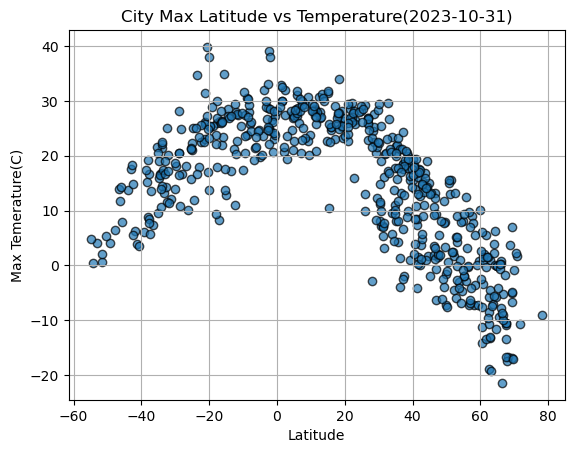

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",marker="o",alpha=0.7,linewidths=1,label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temerature(C)")
plt.title("City Max Latitude vs Temperature(%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

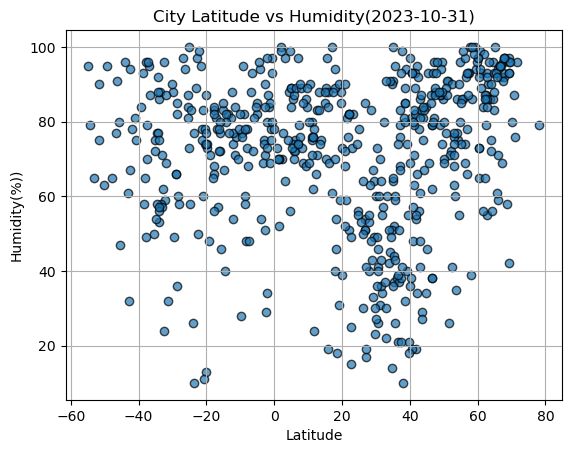

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",marker="o",alpha=0.7,linewidths=1,label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%))")
plt.title("City Latitude vs Humidity(%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

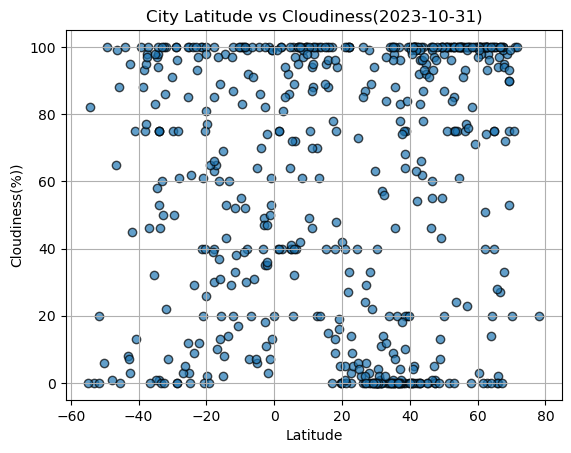

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",marker="o",alpha=0.7,linewidths=1,label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%))")
plt.title("City Latitude vs Cloudiness(%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

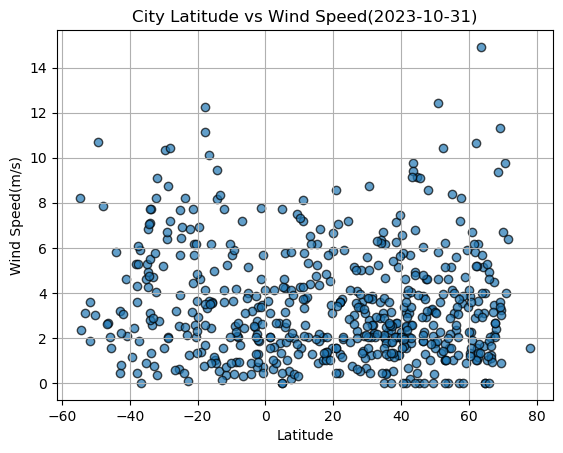

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",marker="o",alpha=0.7,linewidths=1,label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs Wind Speed(%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values,y_values,title,text_coordinates):
    (slope,intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
    regress_values =x_values * slope +intercept
    line_eq = "y=" + str(round(slope,2)) + "x+" +str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f" r-value : {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,magadan,59.5667,150.8000,0.85,94,100,5.91,RU,1698816202
1,anuradhapura,8.3565,80.4173,29.48,69,97,1.98,LK,1698816202
2,cabo san lucas,22.8909,-109.9124,26.53,73,9,1.97,MX,1698816029
4,vorgashor,67.5833,63.9500,-10.82,96,100,2.12,RU,1698816203
7,gargalianoi,37.0667,21.6333,18.53,83,78,1.82,GR,1698816205


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,16.70,77,97,6.83,ZA,1698816203
5,puerto natales,-51.7236,-72.4875,0.66,90,20,1.85,CL,1698816204
6,port-aux-francais,-49.3500,70.2167,4.00,95,100,10.69,TF,1698816205
8,blackmans bay,-43.0167,147.3167,17.63,61,8,0.45,AU,1698816206
9,lubango,-14.9172,13.4925,12.92,67,8,1.03,AO,1698816206


###  Temperature vs. Latitude Linear Regression Plot

 r-value : 0.7435580631003853


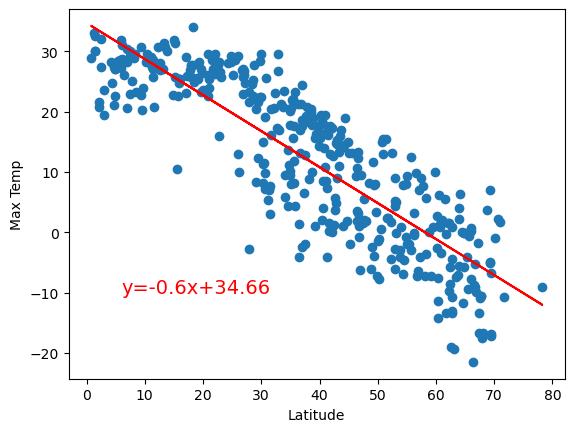

In [35]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plots(x_values,y_values,"Max Temp",(6,-10))

 r-value : 0.5260808422058173


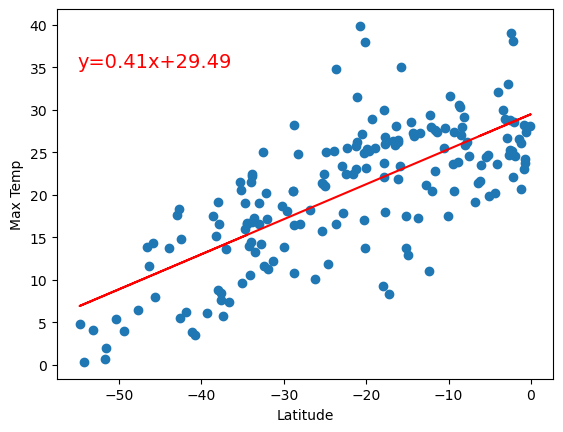

In [36]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plots(x_values,y_values,"Max Temp",(-55,35))

**Discussion about the linear relationship: The r value is 0.74, for linear regression on Northern Hemisphere. This indicates a strong relationship between Temp and Latitude. For southern hemispehere the r value is 0.54 which is beteween 0.5 and 0.7 indicates moderate corelation.

### Humidity vs. Latitude Linear Regression Plot

 r-value : 0.045930298478138745


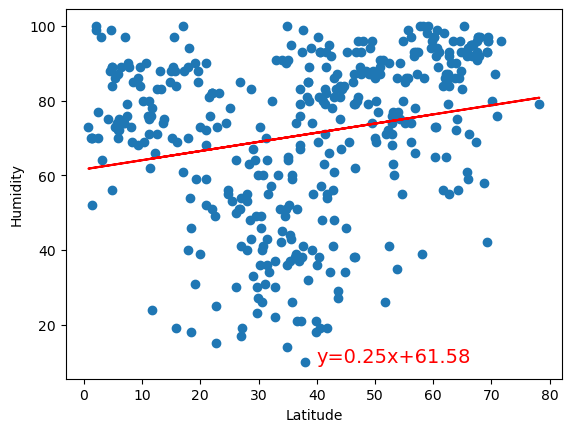

In [37]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plots(x_values,y_values,"Humidity",(40,10))

 r-value : 0.0004306922939113788


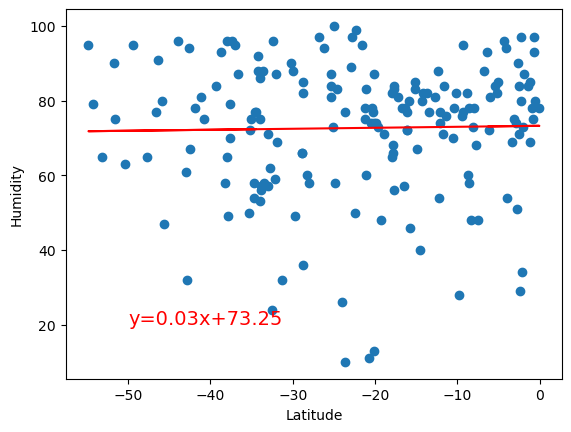

In [38]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plots(x_values,y_values,"Humidity",(-50,20))

**Discussion about the linear relationship:The r values for both nothern hemisphere and southern hemisphere are really low. This says that the relationship between humidity vs latitude is weak

### Cloudiness vs. Latitude Linear Regression Plot

 r-value : 0.017166714918135997


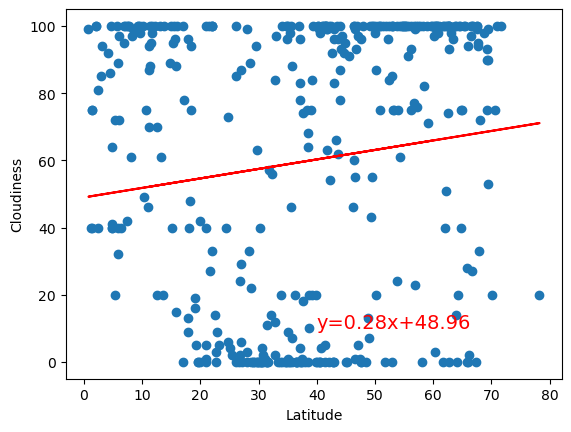

In [39]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plots(x_values,y_values,"Cloudiness",(40,10))

 r-value : 0.0002832087740257347


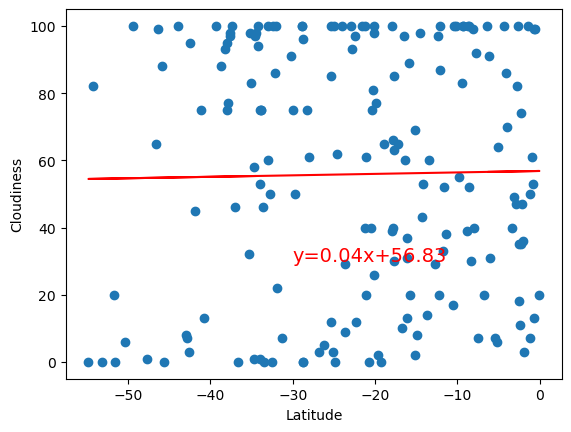

In [40]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plots(x_values,y_values,"Cloudiness",(-30,30))

**Discussion about the linear relationship:The r values for both nothern hemisphere and southern hemisphere are really low. This says that the relationship between Cloudiness vs. Latitude is weak

### Wind Speed vs. Latitude Linear Regression Plot

 r-value : 0.005646756717234178


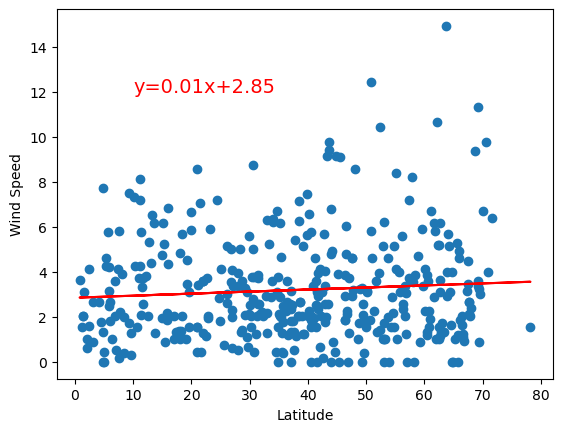

In [41]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plots(x_values,y_values,"Wind Speed",(10,12))

 r-value : 0.02533613284136626


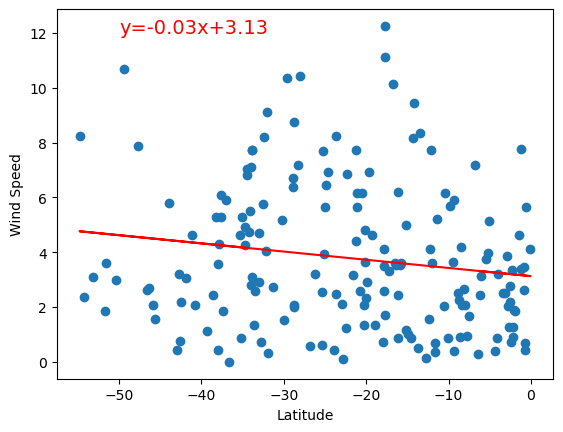

In [42]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plots(x_values,y_values,"Wind Speed",(-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The r values for both nothern hemisphere and southern hemisphere are really low. This says that the relationship between Wind Speed vs. Latitude is weak